In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import math

from sklearn import datasets
from sklearn.model_selection import train_test_split , KFold
from sklearn.preprocessing import Normalizer
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import operator
import difflib



from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn import svm
import warnings
warnings.filterwarnings('ignore')

from collections import Counter
plt.rcdefaults()

In [2]:
df=pd.read_csv('/Users/magzhan_abish/Downloads/wfp_food_prices_kaz.csv')
df= df.drop(labels=0, axis=0)
df

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
1,2005-11-15,Akmolinskaya,Tselinograd,Nur-Sultan,51.17,71.43,cereals and tubers,Potatoes,KG,actual,Retail,KZT,40.0,0.2436
2,2005-11-15,Akmolinskaya,Tselinograd,Nur-Sultan,51.17,71.43,cereals and tubers,Wheat flour (first grade),KG,actual,Retail,KZT,61.0,0.3714
3,2005-11-15,Akmolinskaya,Tselinograd,Nur-Sultan,51.17,71.43,"meat, fish and eggs",Meat (beef),KG,actual,Retail,KZT,403.0,2.4539
4,2005-11-15,Akmolinskaya,Tselinograd,Nur-Sultan,51.17,71.43,milk and dairy,Milk,L,actual,Retail,KZT,58.0,0.3532
5,2005-11-15,Akmolinskaya,Tselinograd,Nur-Sultan,51.17,71.43,oil and fats,Oil (sunflower),L,actual,Retail,KZT,184.0,1.1204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3361,2020-11-15,Kustanayskaya,Qostanay,Kostanay,53.2,63.63,oil and fats,Oil (sunflower),L,actual,Retail,KZT,514.0,1.1986
3362,2020-11-15,Mangistauskaya,Aqtau City area,Aktau,43.65,51.2,cereals and tubers,Potatoes,KG,actual,Retail,KZT,147.0,0.3428
3363,2020-11-15,Mangistauskaya,Aqtau City area,Aktau,43.65,51.2,cereals and tubers,Wheat flour (first grade),KG,actual,Retail,KZT,241.0,0.562
3364,2020-11-15,Mangistauskaya,Aqtau City area,Aktau,43.65,51.2,"meat, fish and eggs",Meat (beef),KG,actual,Retail,KZT,1875.0,4.3722


In [3]:
df.describe()

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
count,3365,3365,3365,3365,3365,3365,3365,3365,3365,3365,3365,3365,3365,3365
unique,181,4,4,4,4,4,4,5,2,1,1,1,679,3005
top,2005-11-15,Almaty City area,Almaty City area,Almaty,43.28,76.9,cereals and tubers,Potatoes,KG,actual,Retail,KZT,125.0,0.3606
freq,19,905,905,905,905,905,1448,724,2171,3365,3365,3365,47,4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3365 entries, 1 to 3365
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       3365 non-null   object
 1   admin1     3365 non-null   object
 2   admin2     3365 non-null   object
 3   market     3365 non-null   object
 4   latitude   3365 non-null   object
 5   longitude  3365 non-null   object
 6   category   3365 non-null   object
 7   commodity  3365 non-null   object
 8   unit       3365 non-null   object
 9   priceflag  3365 non-null   object
 10  pricetype  3365 non-null   object
 11  currency   3365 non-null   object
 12  price      3365 non-null   object
 13  usdprice   3365 non-null   object
dtypes: object(14)
memory usage: 368.2+ KB


In [5]:
df.dtypes

date         object
admin1       object
admin2       object
market       object
latitude     object
longitude    object
category     object
commodity    object
unit         object
priceflag    object
pricetype    object
currency     object
price        object
usdprice     object
dtype: object

In [6]:
df.market.value_counts()

Almaty        905
Kostanay      903
Nur-Sultan    834
Aktau         723
Name: market, dtype: int64

In [7]:
from datetime import datetime
df['date']=df['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

In [8]:
df.dtypes

date         datetime64[ns]
admin1               object
admin2               object
market               object
latitude             object
longitude            object
category             object
commodity            object
unit                 object
priceflag            object
pricetype            object
currency             object
price                object
usdprice             object
dtype: object

In [9]:
grouped=df.groupby('market')
alpha_data=grouped.get_group('Nur-Sultan')
alpha_data

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
1,2005-11-15,Akmolinskaya,Tselinograd,Nur-Sultan,51.17,71.43,cereals and tubers,Potatoes,KG,actual,Retail,KZT,40.0,0.2436
2,2005-11-15,Akmolinskaya,Tselinograd,Nur-Sultan,51.17,71.43,cereals and tubers,Wheat flour (first grade),KG,actual,Retail,KZT,61.0,0.3714
3,2005-11-15,Akmolinskaya,Tselinograd,Nur-Sultan,51.17,71.43,"meat, fish and eggs",Meat (beef),KG,actual,Retail,KZT,403.0,2.4539
4,2005-11-15,Akmolinskaya,Tselinograd,Nur-Sultan,51.17,71.43,milk and dairy,Milk,L,actual,Retail,KZT,58.0,0.3532
5,2005-11-15,Akmolinskaya,Tselinograd,Nur-Sultan,51.17,71.43,oil and fats,Oil (sunflower),L,actual,Retail,KZT,184.0,1.1204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3333,2020-10-15,Akmolinskaya,Tselinograd,Nur-Sultan,51.17,71.43,oil and fats,Oil (sunflower),L,actual,Retail,KZT,517.0,1.212
3348,2020-11-15,Akmolinskaya,Tselinograd,Nur-Sultan,51.17,71.43,cereals and tubers,Potatoes,KG,actual,Retail,KZT,124.0,0.2891
3349,2020-11-15,Akmolinskaya,Tselinograd,Nur-Sultan,51.17,71.43,cereals and tubers,Wheat flour (first grade),KG,actual,Retail,KZT,257.0,0.5993
3350,2020-11-15,Akmolinskaya,Tselinograd,Nur-Sultan,51.17,71.43,"meat, fish and eggs",Meat (beef),KG,actual,Retail,KZT,2196.0,5.1207


In [10]:
beta_data=grouped.get_group('Almaty')
beta_data

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
6,2005-11-15,Almaty City area,Almaty City area,Almaty,43.28,76.9,cereals and tubers,Potatoes,KG,actual,Retail,KZT,49.0,0.2984
7,2005-11-15,Almaty City area,Almaty City area,Almaty,43.28,76.9,cereals and tubers,Wheat flour (first grade),KG,actual,Retail,KZT,53.0,0.3227
8,2005-11-15,Almaty City area,Almaty City area,Almaty,43.28,76.9,"meat, fish and eggs",Meat (beef),KG,actual,Retail,KZT,413.0,2.5148
9,2005-11-15,Almaty City area,Almaty City area,Almaty,43.28,76.9,milk and dairy,Milk,L,actual,Retail,KZT,66.0,0.4019
10,2005-11-15,Almaty City area,Almaty City area,Almaty,43.28,76.9,oil and fats,Oil (sunflower),L,actual,Retail,KZT,166.0,1.0108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3352,2020-11-15,Almaty City area,Almaty City area,Almaty,43.28,76.9,cereals and tubers,Potatoes,KG,actual,Retail,KZT,110.0,0.2565
3353,2020-11-15,Almaty City area,Almaty City area,Almaty,43.28,76.9,cereals and tubers,Wheat flour (first grade),KG,actual,Retail,KZT,242.0,0.5643
3354,2020-11-15,Almaty City area,Almaty City area,Almaty,43.28,76.9,"meat, fish and eggs",Meat (beef),KG,actual,Retail,KZT,2141.0,4.9925
3355,2020-11-15,Almaty City area,Almaty City area,Almaty,43.28,76.9,milk and dairy,Milk,L,actual,Retail,KZT,268.0,0.6249


In [11]:
gamma_data=grouped.get_group('Kostanay')
gamma_data

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
11,2005-11-15,Kustanayskaya,Qostanay,Kostanay,53.2,63.63,cereals and tubers,Potatoes,KG,actual,Retail,KZT,34.0,0.207
12,2005-11-15,Kustanayskaya,Qostanay,Kostanay,53.2,63.63,cereals and tubers,Wheat flour (first grade),KG,actual,Retail,KZT,39.0,0.2375
13,2005-11-15,Kustanayskaya,Qostanay,Kostanay,53.2,63.63,"meat, fish and eggs",Meat (beef),KG,actual,Retail,KZT,380.0,2.3138
14,2005-11-15,Kustanayskaya,Qostanay,Kostanay,53.2,63.63,milk and dairy,Milk,L,actual,Retail,KZT,50.0,0.3045
15,2005-11-15,Kustanayskaya,Qostanay,Kostanay,53.2,63.63,oil and fats,Oil (sunflower),L,actual,Retail,KZT,173.0,1.0534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3357,2020-11-15,Kustanayskaya,Qostanay,Kostanay,53.2,63.63,cereals and tubers,Potatoes,KG,actual,Retail,KZT,104.0,0.2425
3358,2020-11-15,Kustanayskaya,Qostanay,Kostanay,53.2,63.63,cereals and tubers,Wheat flour (first grade),KG,actual,Retail,KZT,159.0,0.3708
3359,2020-11-15,Kustanayskaya,Qostanay,Kostanay,53.2,63.63,"meat, fish and eggs",Meat (beef),KG,actual,Retail,KZT,1834.0,4.2766
3360,2020-11-15,Kustanayskaya,Qostanay,Kostanay,53.2,63.63,milk and dairy,Milk,L,actual,Retail,KZT,190.0,0.4431


In [12]:
ultra_data=grouped.get_group('Aktau')
ultra_data

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
16,2005-11-15,Mangistauskaya,Aqtau City area,Aktau,43.65,51.2,cereals and tubers,Potatoes,KG,actual,Retail,KZT,55.0,0.3349
17,2005-11-15,Mangistauskaya,Aqtau City area,Aktau,43.65,51.2,cereals and tubers,Wheat flour (first grade),KG,actual,Retail,KZT,50.0,0.3045
18,2005-11-15,Mangistauskaya,Aqtau City area,Aktau,43.65,51.2,"meat, fish and eggs",Meat (beef),KG,actual,Retail,KZT,534.0,3.2515
19,2005-11-15,Mangistauskaya,Aqtau City area,Aktau,43.65,51.2,oil and fats,Oil (sunflower),L,actual,Retail,KZT,186.0,1.1326
35,2005-12-15,Mangistauskaya,Aqtau City area,Aktau,43.65,51.2,cereals and tubers,Potatoes,KG,actual,Retail,KZT,55.0,0.3361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3347,2020-10-15,Mangistauskaya,Aqtau City area,Aktau,43.65,51.2,oil and fats,Oil (sunflower),L,actual,Retail,KZT,518.0,1.2143
3362,2020-11-15,Mangistauskaya,Aqtau City area,Aktau,43.65,51.2,cereals and tubers,Potatoes,KG,actual,Retail,KZT,147.0,0.3428
3363,2020-11-15,Mangistauskaya,Aqtau City area,Aktau,43.65,51.2,cereals and tubers,Wheat flour (first grade),KG,actual,Retail,KZT,241.0,0.562
3364,2020-11-15,Mangistauskaya,Aqtau City area,Aktau,43.65,51.2,"meat, fish and eggs",Meat (beef),KG,actual,Retail,KZT,1875.0,4.3722


In [13]:
df = df.explode('price')
df['price'] = df['price'].astype('float')

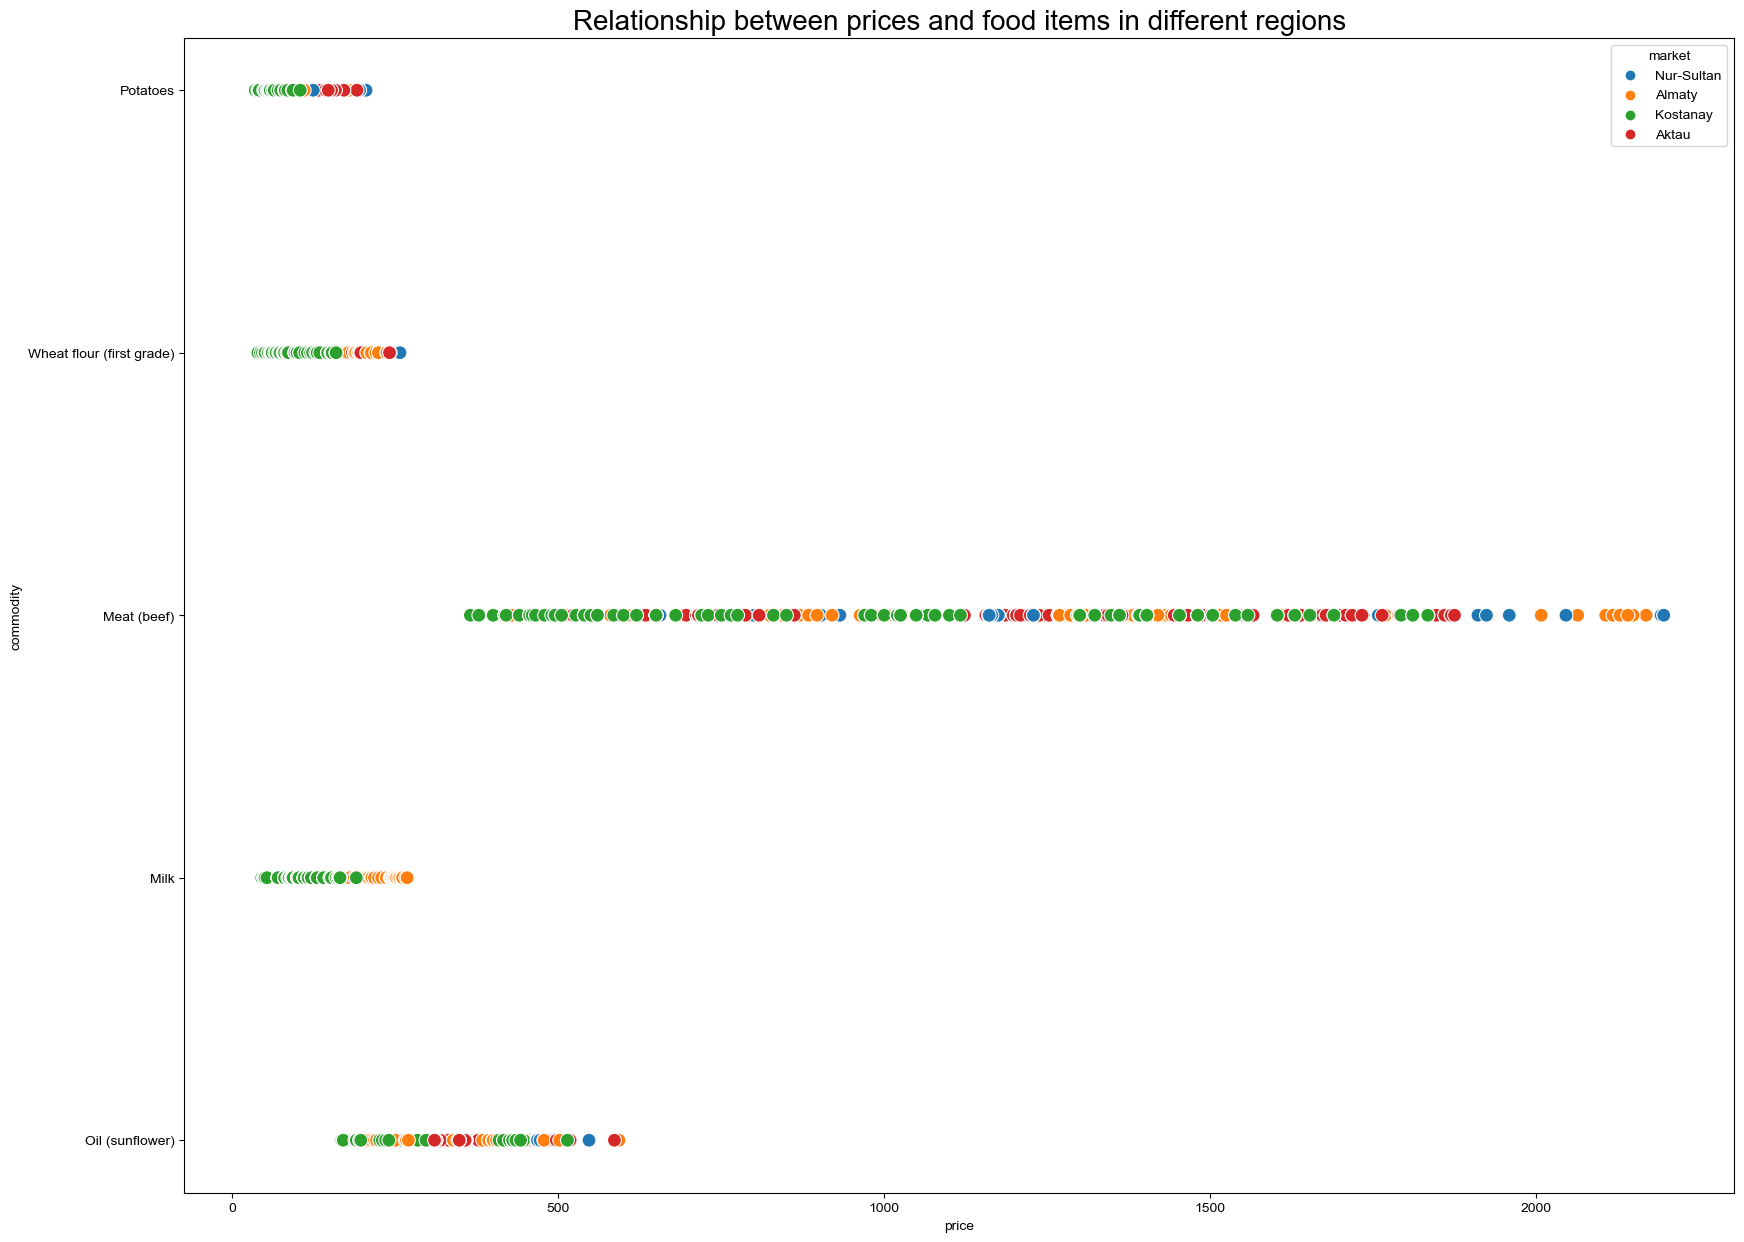

In [14]:
fig,ax = plt.subplots(figsize=(20, 15))
sns.scatterplot(x='price',y='commodity',hue = 'market',ax = ax,s=100, color = '#e14735',data=df)
sns.set_theme(font_scale=1.2)
plt.title("Relationship between prices and food items in different regions", fontsize=20)
plt.show()

<AxesSubplot:title={'center':'Nur-Sultan(Astana)'}, xlabel='price', ylabel='commodity'>

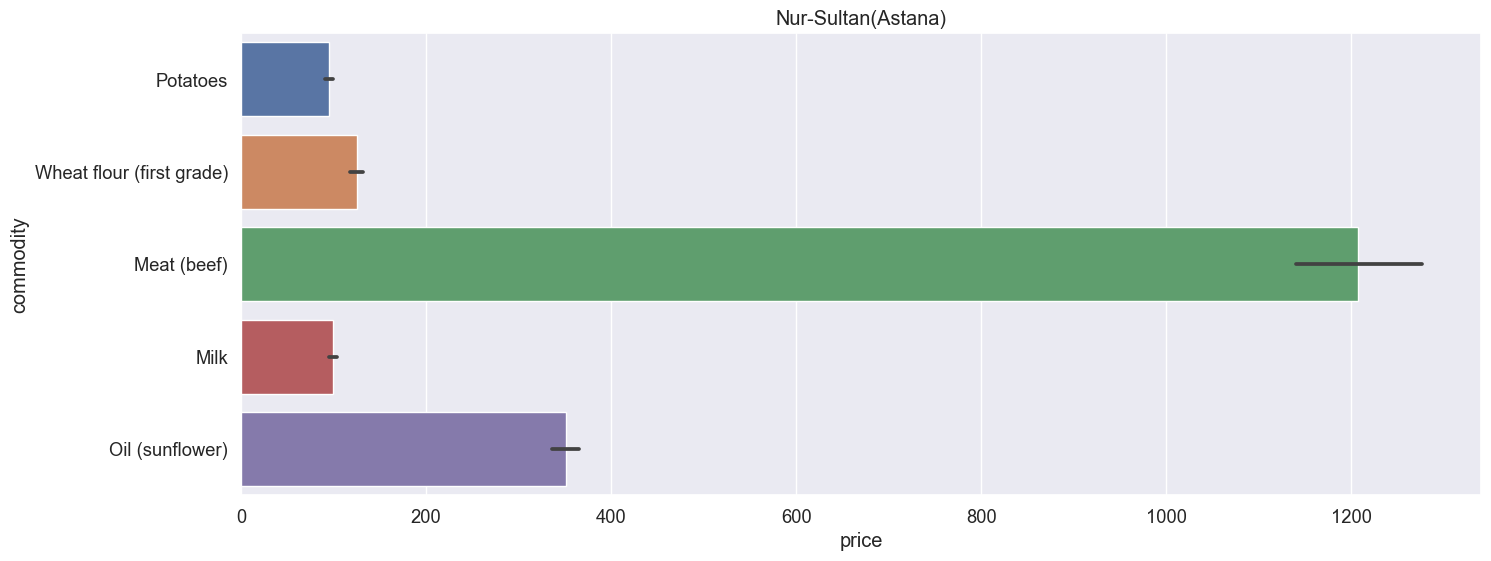

In [15]:
plt.figure(figsize=(16, 6))
plt.title("Nur-Sultan(Astana)")
sns.set_theme(font_scale=1.2)
sns.barplot(x=df['price'],y='commodity',data=alpha_data)

<AxesSubplot:title={'center':'Almaty'}, xlabel='price', ylabel='commodity'>

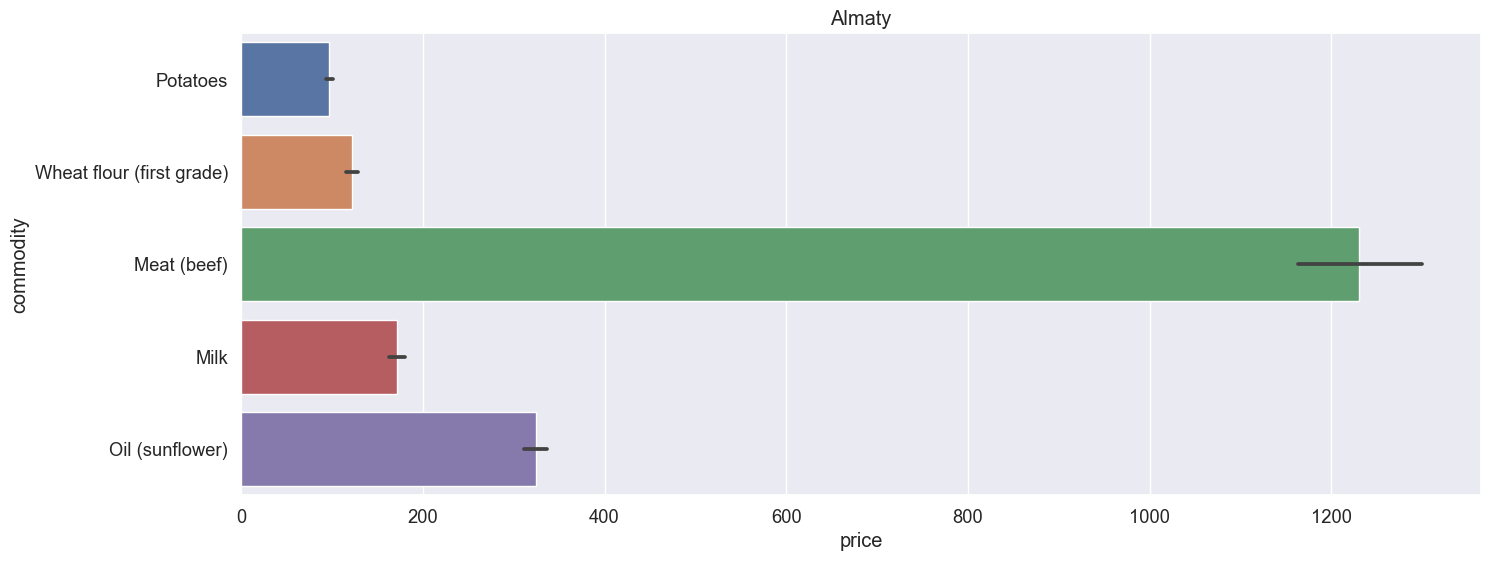

In [16]:
plt.figure(figsize=(16, 6))
plt.title("Almaty")
sns.set_theme(font_scale=1.2)
sns.barplot(x=df['price'],y='commodity',data=beta_data)

<AxesSubplot:title={'center':'Kostanay'}, xlabel='price', ylabel='commodity'>

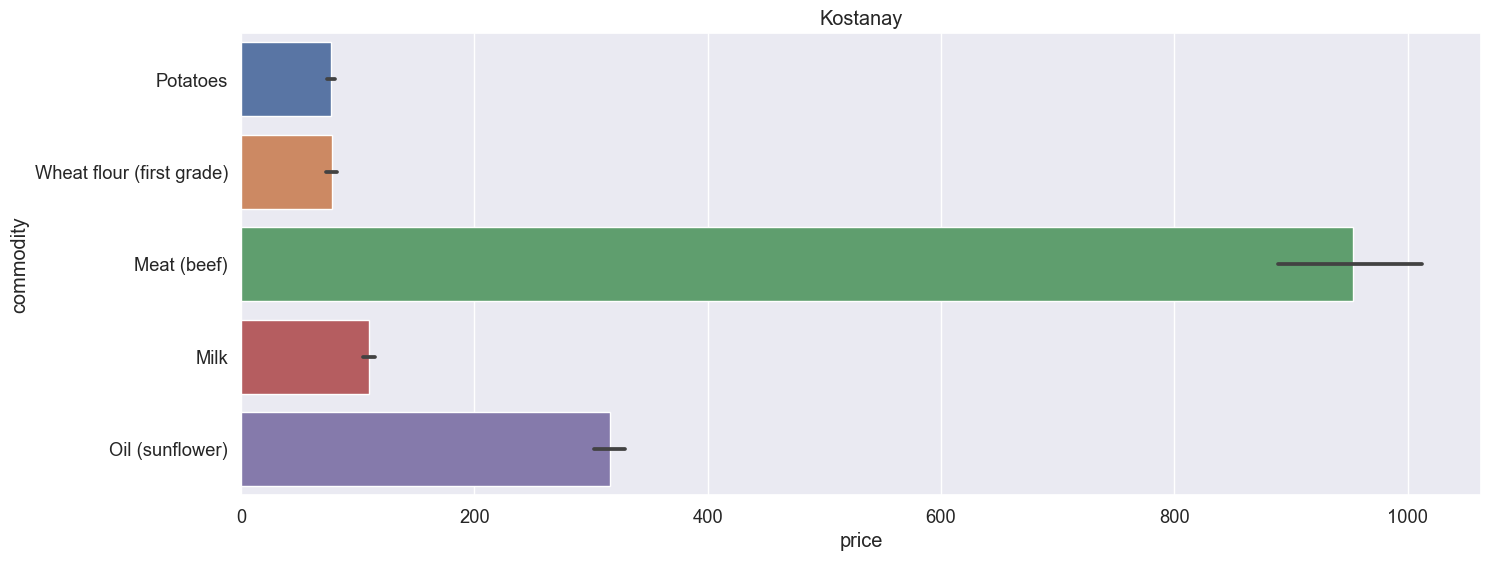

In [17]:
plt.figure(figsize=(16, 6))
plt.title("Kostanay")
sns.set_theme(font_scale=1.2)
sns.barplot(x=df['price'],y='commodity',data=gamma_data)

<AxesSubplot:title={'center':'Aktau'}, xlabel='price', ylabel='commodity'>

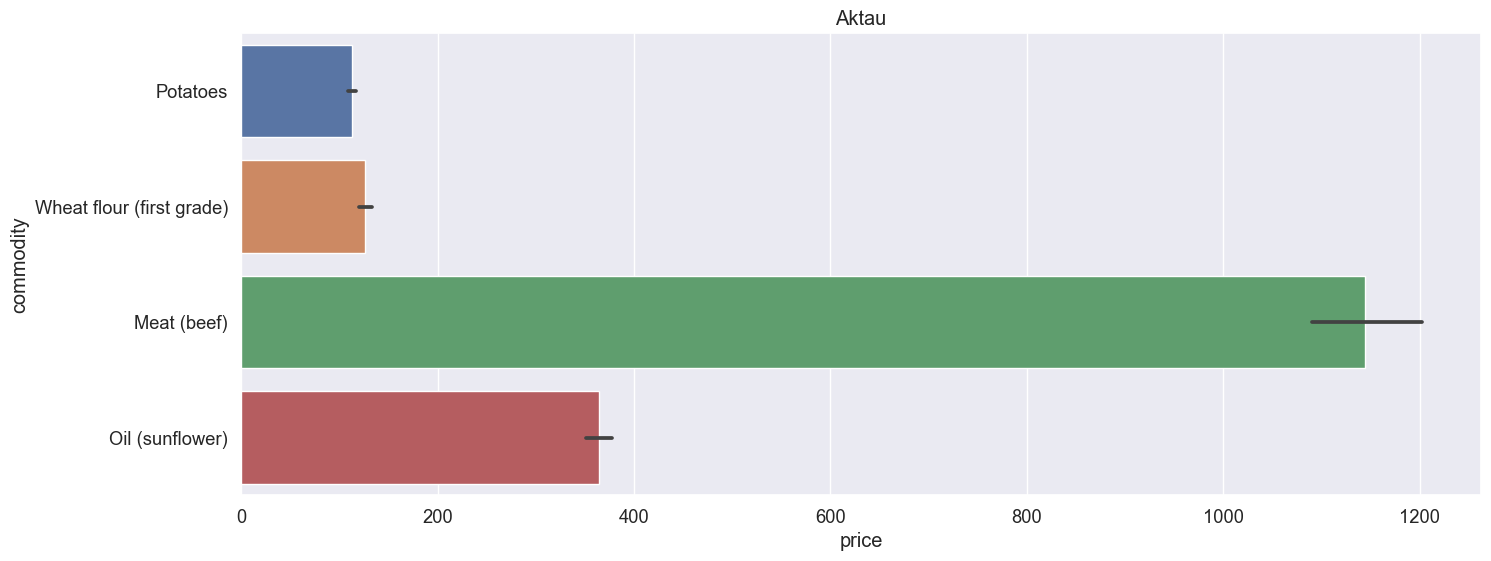

In [18]:
plt.figure(figsize=(16, 6))
plt.title("Aktau")
sns.set_theme(font_scale=1.2)
sns.barplot(x=df['price'],y='commodity',data=ultra_data)

<AxesSubplot:title={'center':'Nur-Sultan(Astana)'}, xlabel='price', ylabel='unit'>

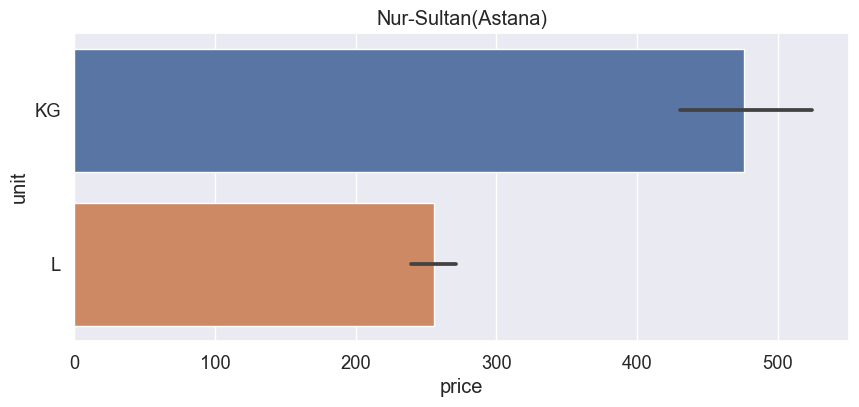

In [19]:
plt.figure(figsize=(10, 4))
plt.title("Nur-Sultan(Astana)")
sns.set_theme(font_scale=1.2)
sns.barplot(x=df['price'],y='unit',data=alpha_data)

<AxesSubplot:title={'center':'Almaty'}, xlabel='price', ylabel='unit'>

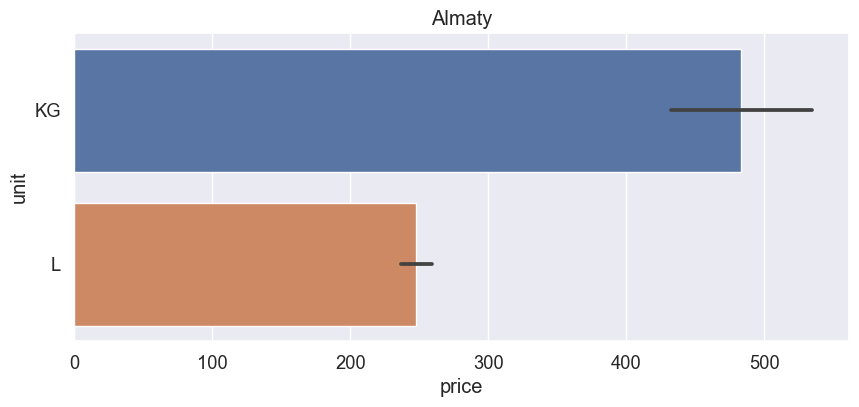

In [20]:
plt.figure(figsize=(10, 4))
plt.title("Almaty")
sns.set_theme(font_scale=1.2)
sns.barplot(x=df['price'],y='unit',data=beta_data)

In [21]:
alpha_data['price']=pd.to_numeric(alpha_data['price'])
beta_data['price']=pd.to_numeric(beta_data['price'])
gamma_data['price']=pd.to_numeric(gamma_data['price'])
ultra_data['price']=pd.to_numeric(ultra_data['price'])

In [22]:
beta_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 905 entries, 6 to 3356
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       905 non-null    datetime64[ns]
 1   admin1     905 non-null    object        
 2   admin2     905 non-null    object        
 3   market     905 non-null    object        
 4   latitude   905 non-null    object        
 5   longitude  905 non-null    object        
 6   category   905 non-null    object        
 7   commodity  905 non-null    object        
 8   unit       905 non-null    object        
 9   priceflag  905 non-null    object        
 10  pricetype  905 non-null    object        
 11  currency   905 non-null    object        
 12  price      905 non-null    float64       
 13  usdprice   905 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(12)
memory usage: 138.3+ KB


<module 'matplotlib.pyplot' from '/Users/magzhan_abish/opt/anaconda3/lib/python3.9/site-packages/matplotlib/pyplot.py'>

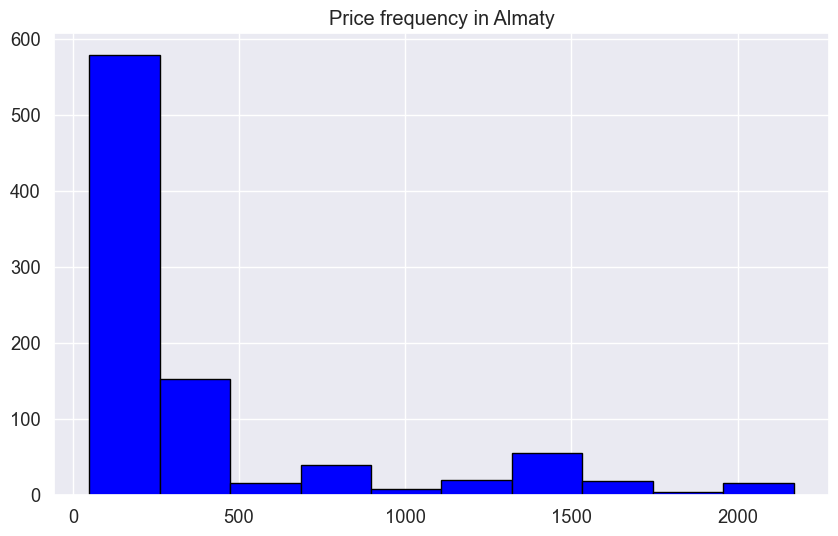

In [23]:
plt.figure(figsize=(10,6))
plt.title("Price frequency in Almaty")
plt.hist(beta_data['price'], color = 'blue', edgecolor = 'black')
plt

In [24]:
print("Astana's total price is",alpha_data.price.sum())
print("Almaty's total price is",beta_data.price.sum())
print("Kostanay's total price is",gamma_data.price.sum())
print("Aktau's total price is",gamma_data.price.sum())

Astana's total price is 332846.0
Almaty's total price is 352036.0
Kostanay's total price is 277291.0
Aktau's total price is 277291.0


In [25]:
Astana = alpha_data.groupby("commodity")["price"].sum()
Astana

commodity
Meat (beef)                  218549.0
Milk                          10945.0
Oil (sunflower)               63496.0
Potatoes                      17218.0
Wheat flour (first grade)     22638.0
Name: price, dtype: float64

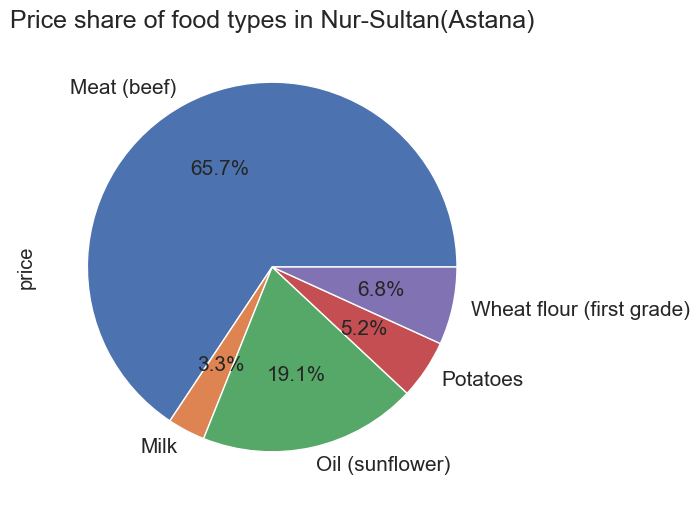

In [26]:
plt.figure(figsize=(10,6))
plt.title("Price share of food types in Nur-Sultan(Astana)", fontsize=18)
Astana.plot.pie(autopct="%1.1f%%", fontsize=15);

In [27]:
Almaty = beta_data.groupby("commodity")["price"].sum()
Almaty

commodity
Meat (beef)                  222624.0
Milk                          30999.0
Oil (sunflower)               58750.0
Potatoes                      17547.0
Wheat flour (first grade)     22116.0
Name: price, dtype: float64

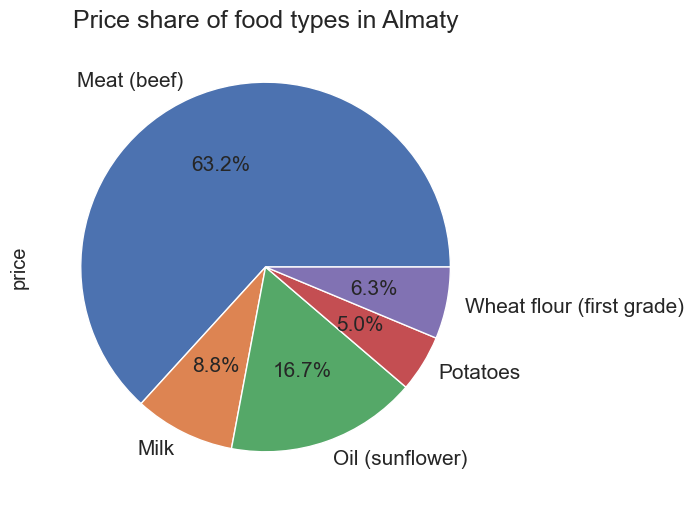

In [28]:
plt.figure(figsize=(10,6))
plt.title("Price share of food types in Almaty", fontsize=18)
Almaty.plot.pie(autopct="%1.1f%%", fontsize=15);

                                        price
date                                         
2005-11-30  AxesSubplot(0.125,0.2;0.775x0.68)
2005-12-31  AxesSubplot(0.125,0.2;0.775x0.68)
2006-01-31  AxesSubplot(0.125,0.2;0.775x0.68)
2006-02-28  AxesSubplot(0.125,0.2;0.775x0.68)
2006-03-31  AxesSubplot(0.125,0.2;0.775x0.68)
...                                       ...
2020-07-31  AxesSubplot(0.125,0.2;0.775x0.68)
2020-08-31  AxesSubplot(0.125,0.2;0.775x0.68)
2020-09-30  AxesSubplot(0.125,0.2;0.775x0.68)
2020-10-31  AxesSubplot(0.125,0.2;0.775x0.68)
2020-11-30  AxesSubplot(0.125,0.2;0.775x0.68)

[181 rows x 1 columns]


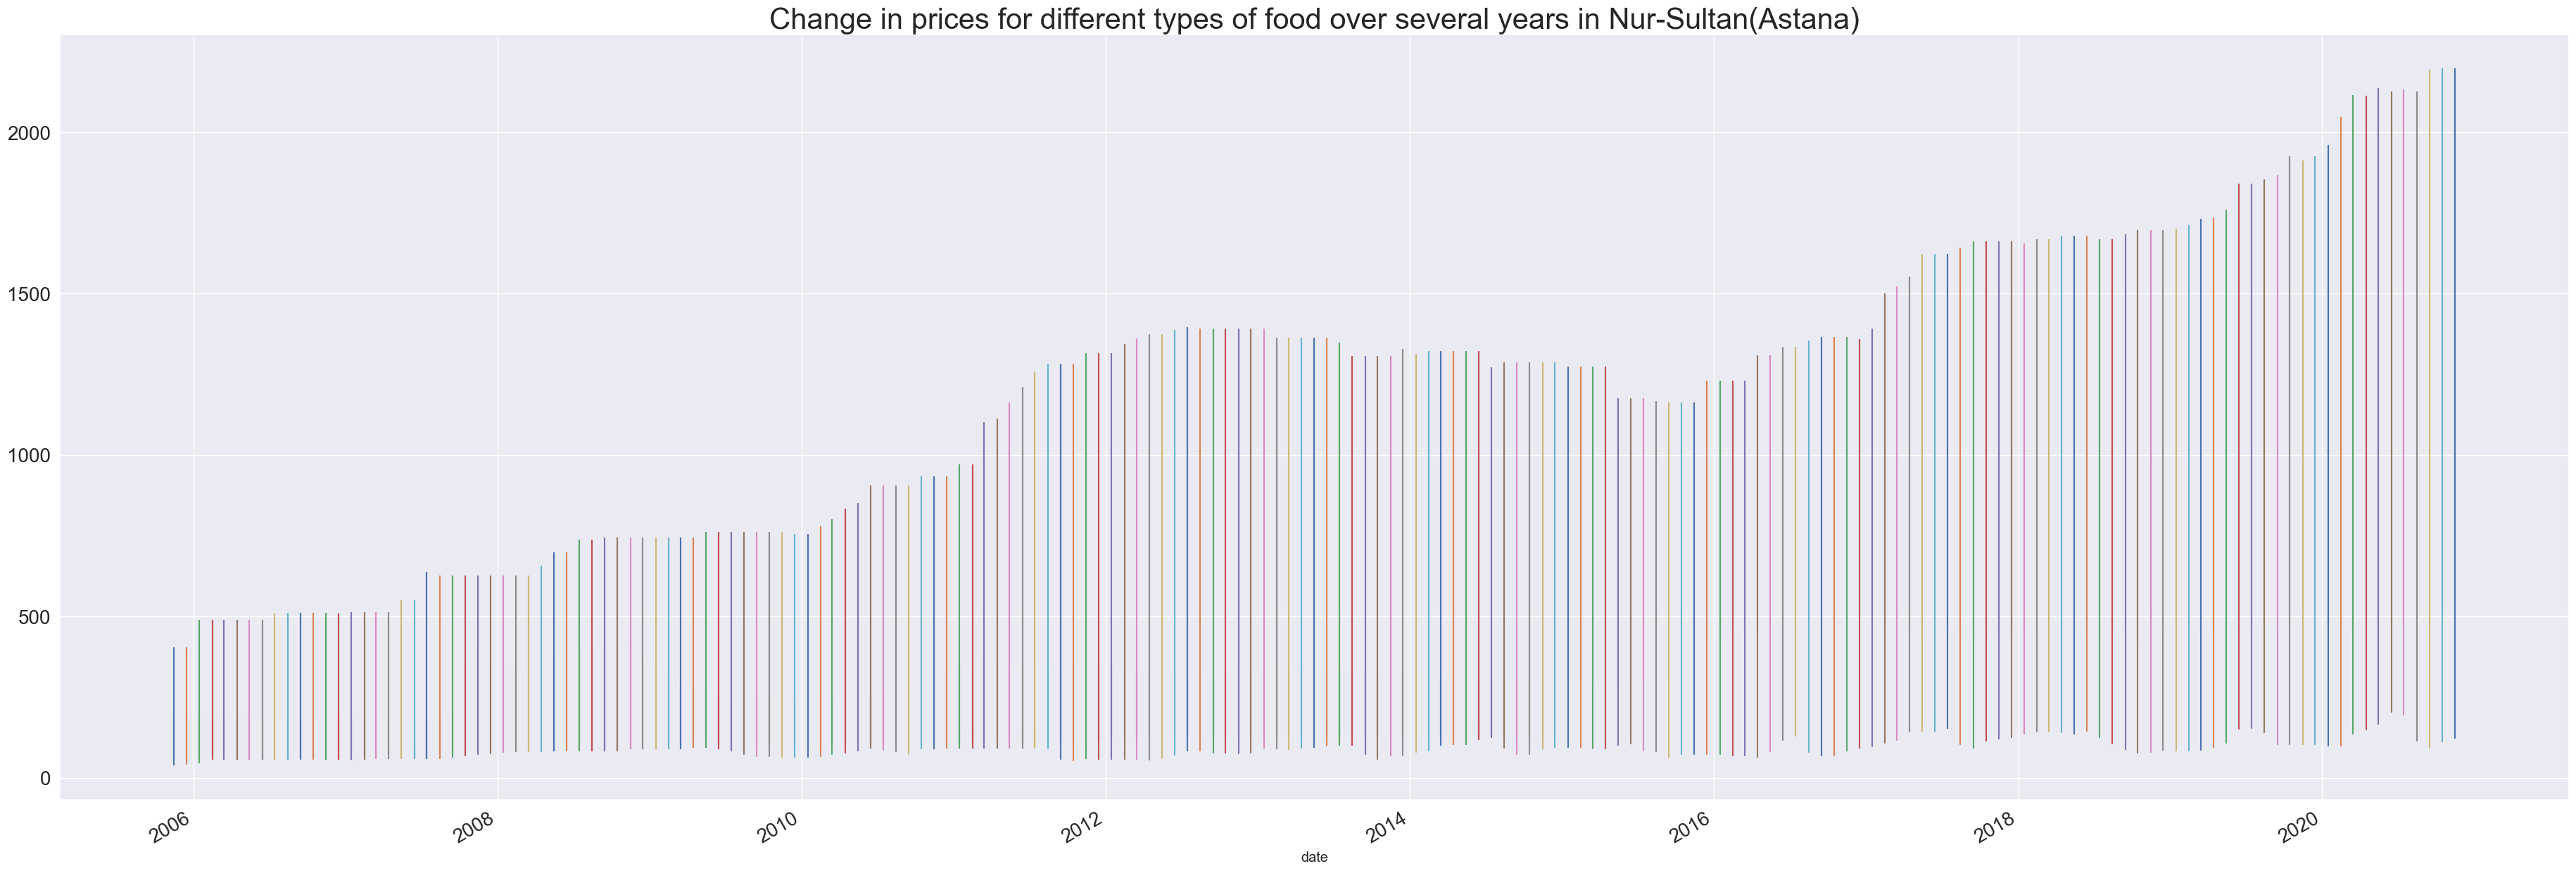

In [29]:
plt.figure(figsize=(46,16))
plt.title("Change in prices for different types of food over several years in Nur-Sultan(Astana)",fontsize=30)
#print(alpha_data[['price','date']].set_index('date').resample('M').mean().plot())
print(alpha_data[['price','date']].set_index('date').resample('M').plot(fontsize=20))

                                        price
date                                         
2005-11-30  AxesSubplot(0.125,0.2;0.775x0.68)
2005-12-31  AxesSubplot(0.125,0.2;0.775x0.68)
2006-01-31  AxesSubplot(0.125,0.2;0.775x0.68)
2006-02-28  AxesSubplot(0.125,0.2;0.775x0.68)
2006-03-31  AxesSubplot(0.125,0.2;0.775x0.68)
...                                       ...
2020-07-31  AxesSubplot(0.125,0.2;0.775x0.68)
2020-08-31  AxesSubplot(0.125,0.2;0.775x0.68)
2020-09-30  AxesSubplot(0.125,0.2;0.775x0.68)
2020-10-31  AxesSubplot(0.125,0.2;0.775x0.68)
2020-11-30  AxesSubplot(0.125,0.2;0.775x0.68)

[181 rows x 1 columns]


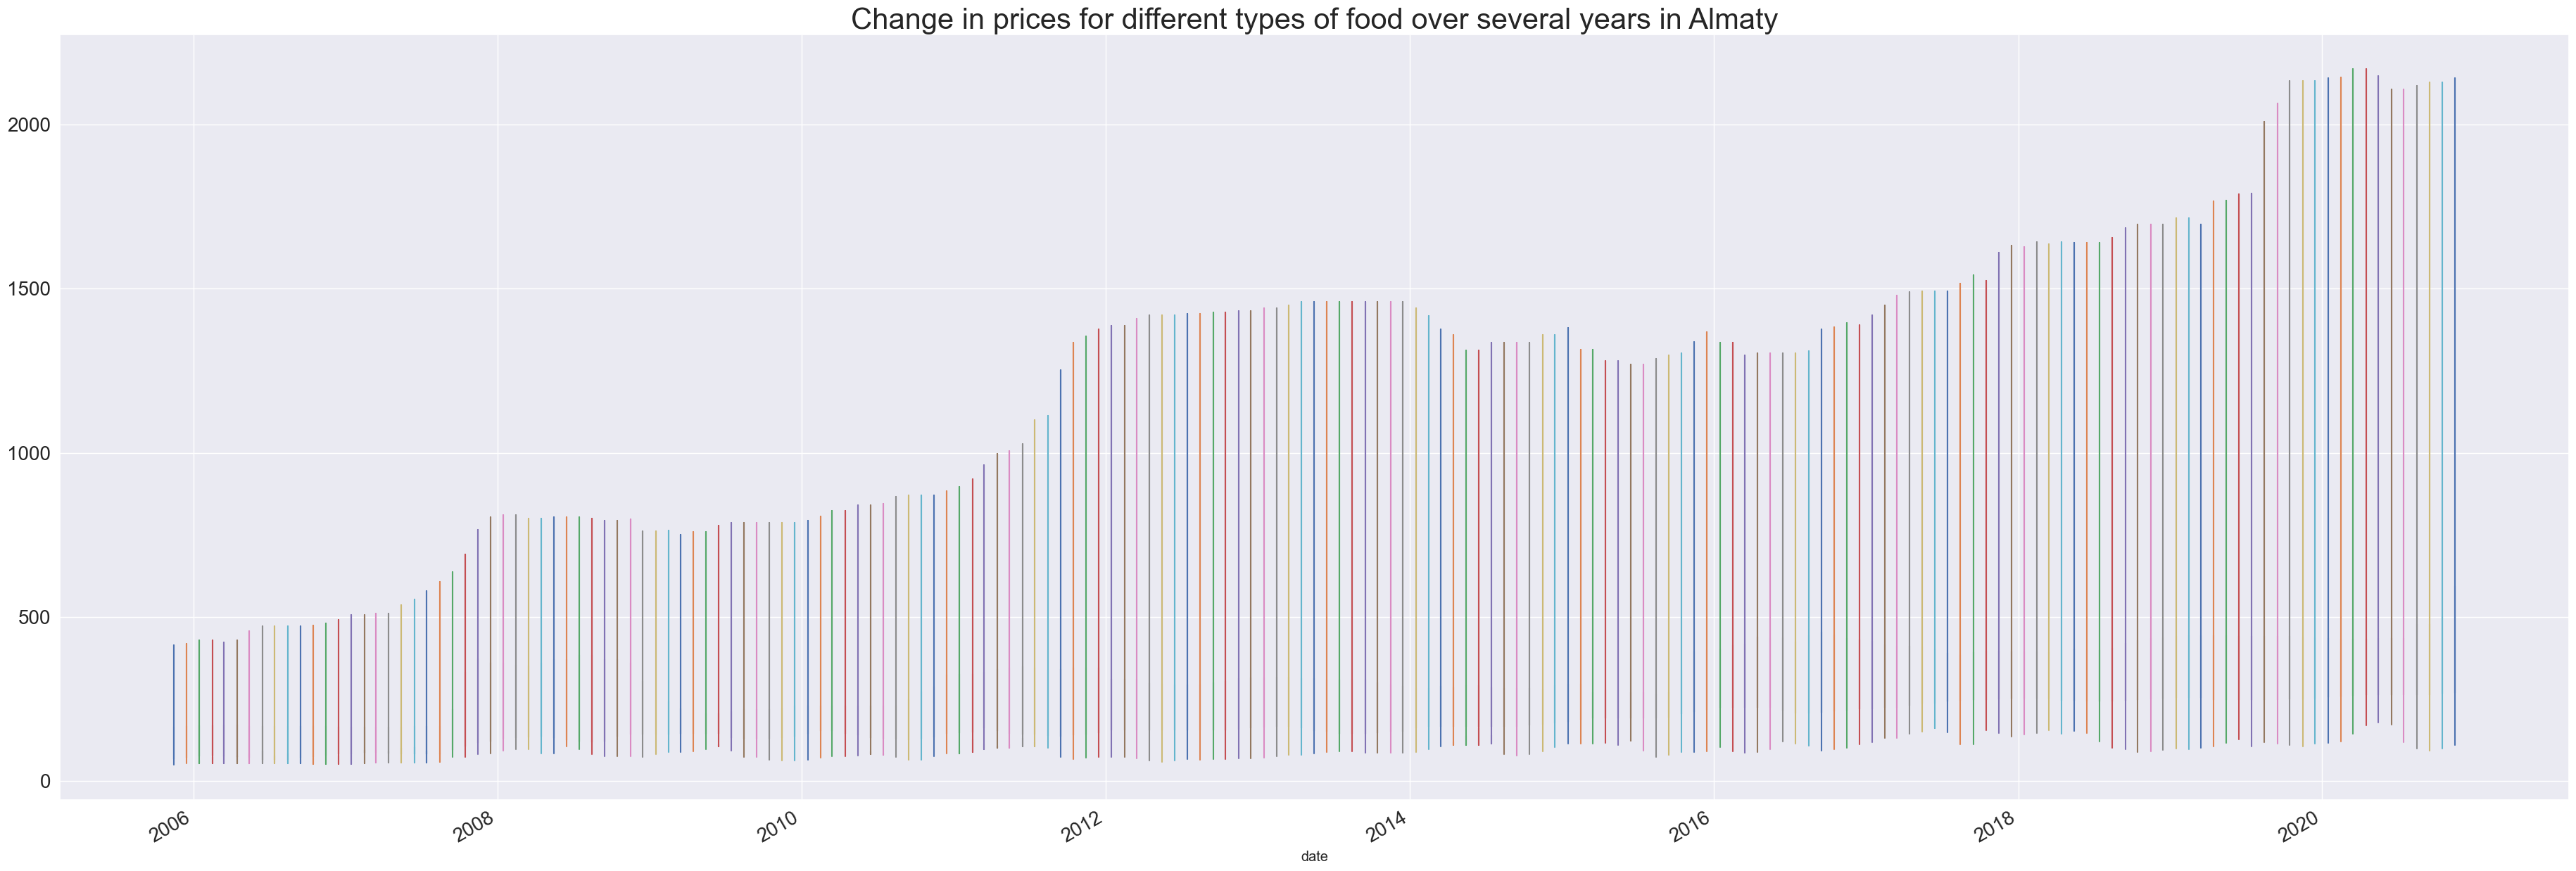

In [30]:
plt.figure(figsize=(46,16))
plt.title("Change in prices for different types of food over several years in Almaty", fontsize=30)
#print(beta_data[['price','date']].set_index('date').resample('M').mean().plot())
print(beta_data[['price','date']].set_index('date').resample('M').plot(fontsize=20))

                                        price
date                                         
2005-11-30  AxesSubplot(0.125,0.2;0.775x0.68)
2005-12-31  AxesSubplot(0.125,0.2;0.775x0.68)
2006-01-31  AxesSubplot(0.125,0.2;0.775x0.68)
2006-02-28  AxesSubplot(0.125,0.2;0.775x0.68)
2006-03-31  AxesSubplot(0.125,0.2;0.775x0.68)
...                                       ...
2020-07-31  AxesSubplot(0.125,0.2;0.775x0.68)
2020-08-31  AxesSubplot(0.125,0.2;0.775x0.68)
2020-09-30  AxesSubplot(0.125,0.2;0.775x0.68)
2020-10-31  AxesSubplot(0.125,0.2;0.775x0.68)
2020-11-30  AxesSubplot(0.125,0.2;0.775x0.68)

[181 rows x 1 columns]


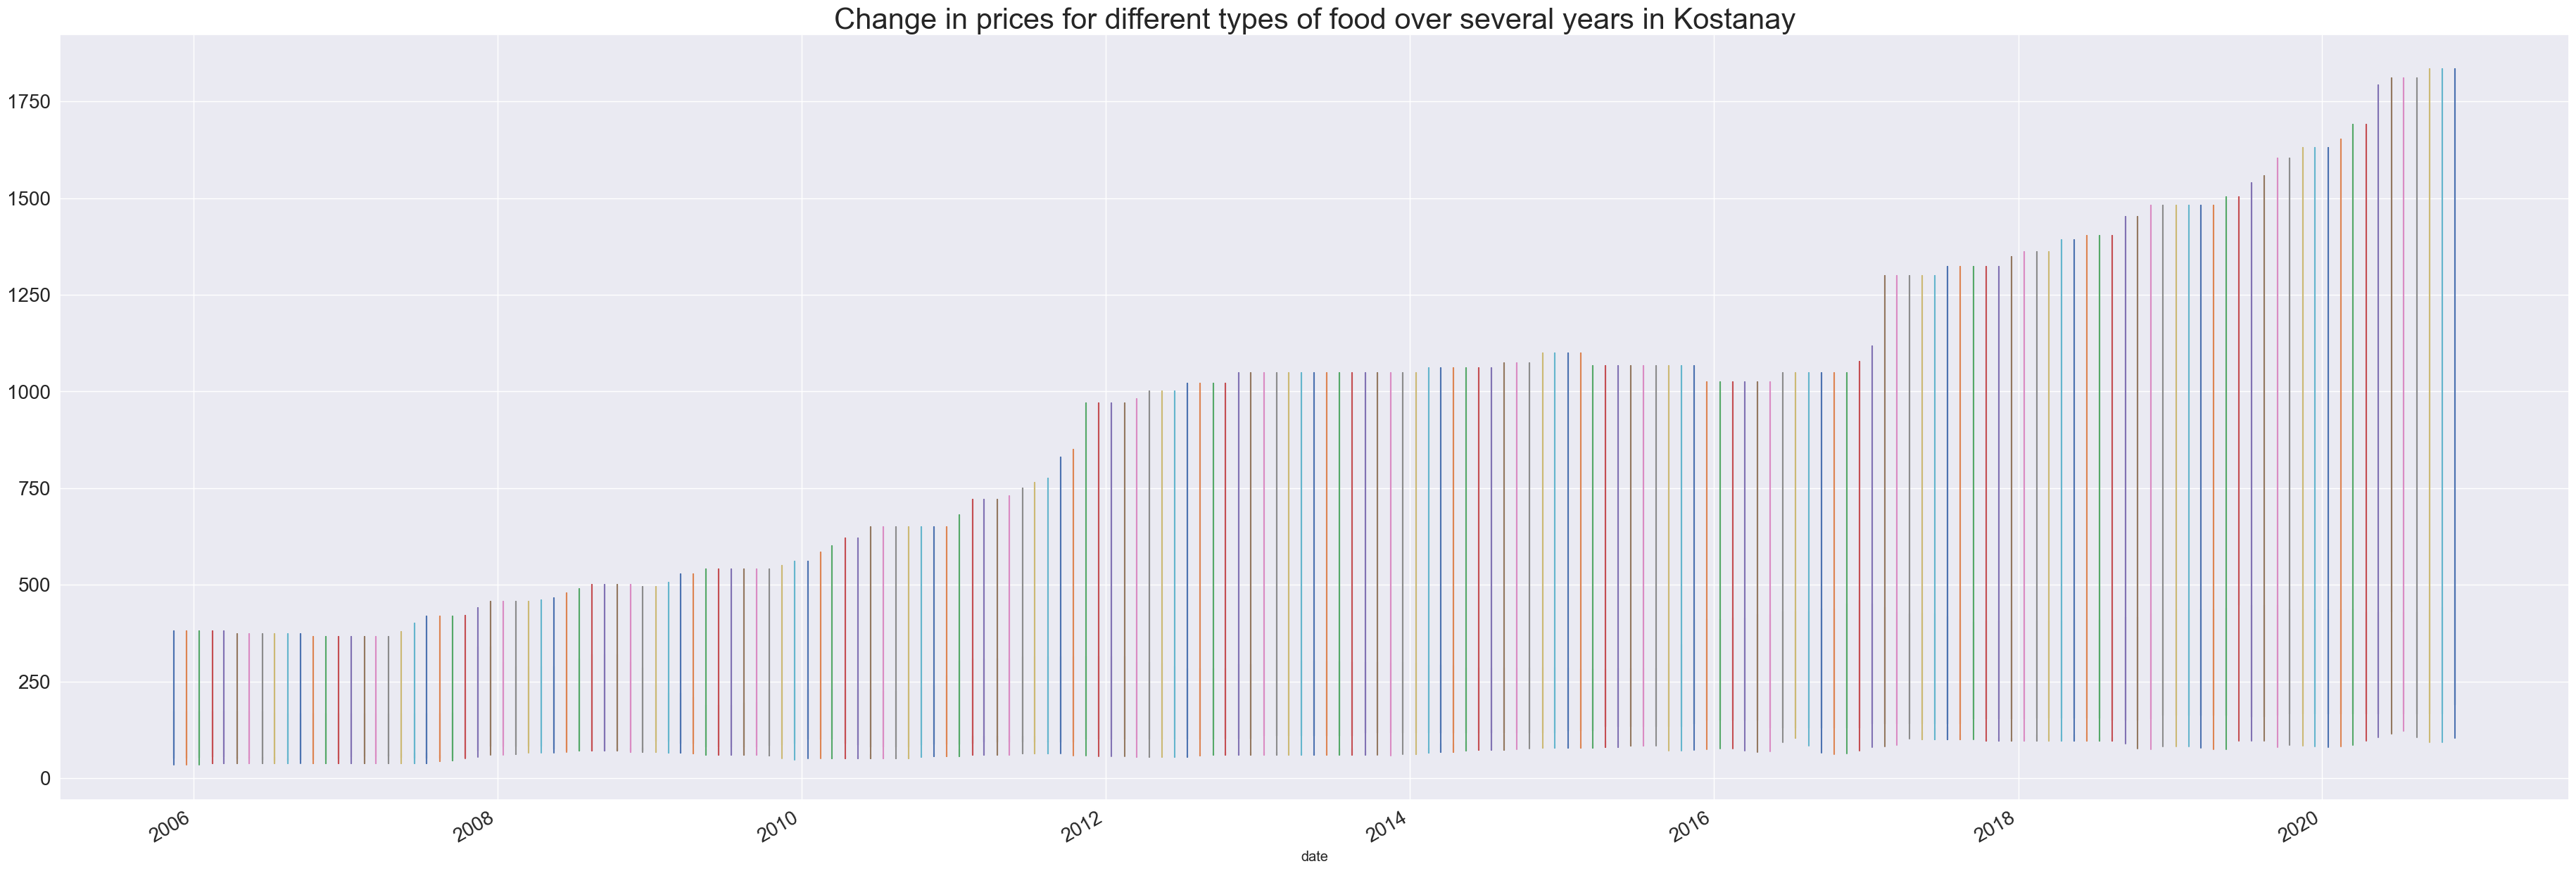

In [31]:
plt.figure(figsize=(46,16))
plt.title("Change in prices for different types of food over several years in Kostanay", fontsize=30)
#print(gamma_data[['price','date']].set_index('date').resample('M').mean().plot())
print(gamma_data[['price','date']].set_index('date').resample('M').plot(fontsize=20))

                                        price
date                                         
2005-11-30  AxesSubplot(0.125,0.2;0.775x0.68)
2005-12-31  AxesSubplot(0.125,0.2;0.775x0.68)
2006-01-31  AxesSubplot(0.125,0.2;0.775x0.68)
2006-02-28  AxesSubplot(0.125,0.2;0.775x0.68)
2006-03-31  AxesSubplot(0.125,0.2;0.775x0.68)
...                                       ...
2020-07-31  AxesSubplot(0.125,0.2;0.775x0.68)
2020-08-31  AxesSubplot(0.125,0.2;0.775x0.68)
2020-09-30  AxesSubplot(0.125,0.2;0.775x0.68)
2020-10-31  AxesSubplot(0.125,0.2;0.775x0.68)
2020-11-30  AxesSubplot(0.125,0.2;0.775x0.68)

[181 rows x 1 columns]


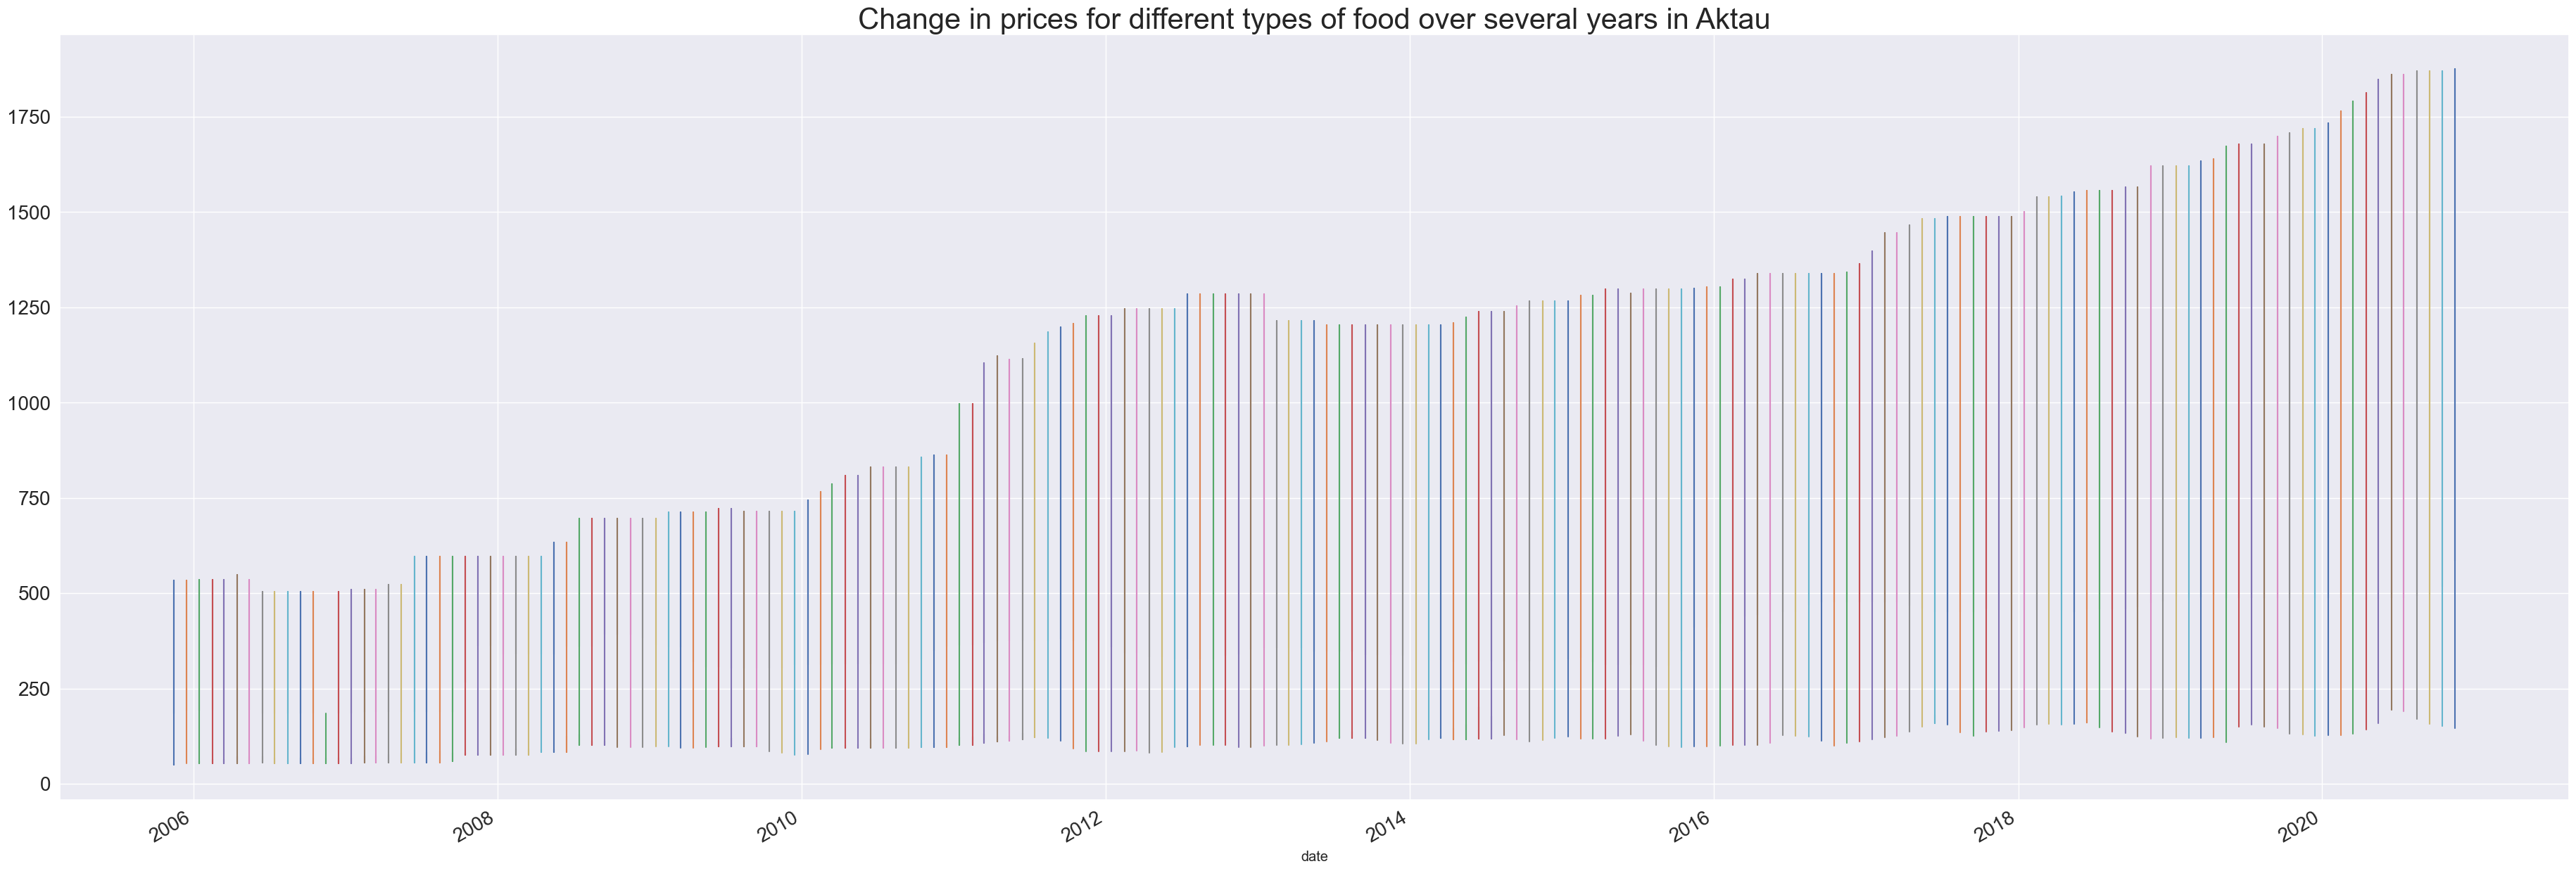

In [32]:
plt.figure(figsize=(46,16))
plt.title("Change in prices for different types of food over several years in Aktau", fontsize=30)
#print(ultra_data[['price','date']].set_index('date').resample('M').mean().plot())
print(ultra_data[['price','date']].set_index('date').resample('M').plot(fontsize=20))